# Kelman Filter の練習

参考サイト  
https://github.com/rlabbe/filterpy  
http://filterpy.readthedocs.io/en/latest/kalman/KalmanFilter.html

---

In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

In [3]:
#set  initial position and velocity
initial_location = 0
initial_velocity = 0
initical_time = 0
time_interval = 0.25

position_rate_1 = 5
position_rate_2 = -2
set_random_1 = 2
set_random_2 = 2
sum_flame_1 = 50
sum_flame_2 = 50

#set  filter
R_initial = 100
P_initial = 1000
d_error = 1
Q_initial = 4*d_error/(time_interval**4)
print(Q_initial)

1024.0


Text(0,0.5,'velocity')

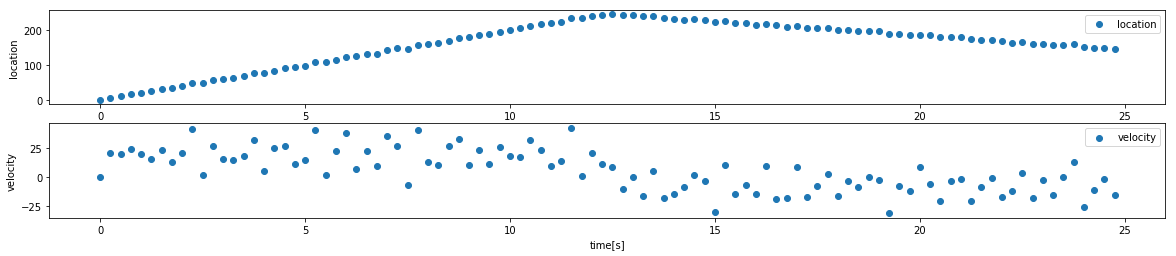

In [4]:
#set  real position and velocity
location = []
velocity = []
time = []

for flame in range(sum_flame_1 + sum_flame_2):
    if flame == 0:
        location.append(initial_location)
        velocity.append(initial_velocity)
        time.append(initical_time)
        continue
    
    _time = time_interval * flame
    time.append(_time)
    
    if flame < sum_flame_1:
        _location = flame *position_rate_1 +  set_random_1 * random.randn()
        location.append(_location)

        _velocity = ( _location - location[flame - 1])/(time_interval )
        velocity.append(_velocity)
    
    else:
        _location = (flame - sum_flame_1 -1)*position_rate_2 +  set_random_2 * random.randn() + location[sum_flame_1 - 1]
        location.append(_location)

        _velocity = ( _location - location[flame - 1])/(time_interval )
        velocity.append(_velocity)
        
plt.subplots(figsize=(20,8))   
plt.subplot(4, 1, 1)
plt.scatter(x= time, y =location, label = "location" )
plt.legend() 
plt.xlabel('time[s]')
plt.ylabel('location')

plt.subplot(4, 1, 2)
plt.scatter(x= time, y = velocity, label = "velocity" )
plt.legend() 
plt.xlabel('time[s]')
plt.ylabel('velocity')

In [5]:
my_filter = KalmanFilter(dim_x=2, dim_z=1)
my_filter.x = np.array([[0],[0]])       # initial state (location and velocity)
my_filter.F = np.array([[1.,time_interval],[0.,1.]])    # state transition matrix 本だとA
my_filter.H = np.array([[1.,0.]])    # Measurement function　本だとC
my_filter.R = R_initial                      # observation noise　カルマンゲインの分母に入る　本だとQ
my_filter.P = P_initial     # init covariance matrix 本だとΣ ここでは初期値を設定
my_filter.Q = Q_discrete_white_noise(2, time_interval, Q_initial) # prediction noise(process uncertainty ) 引数(dim=2, dt=1.0, var=0.1)

kal_location = [initial_location]
kal_velocity = [initial_velocity]
val_location = []
val_velocity = []

for flame in range(1, sum_flame_1 + sum_flame_2):
    my_filter.predict()
    predict = my_filter.x
    my_filter.update(location[flame])
    update = my_filter.x
    val = my_filter.P

    # do something with the output
    kal_location.append(update[0])
    kal_velocity.append(update[1])
    val_location.append(val[0][0])
    val_velocity.append(val[1][1])
    print("predict  location : {} velocity: {}".format(predict[0], predict[1]))
    print("update  location : {} velocity: {}".format(update[0], update[1]))
    print("val_location : {} val_velocity: {}".format(val[0][0], val[1][1]))
    print()

predict  location : [ 0.] velocity: [ 0.]
update  location : [ 4.71238548] velocity: [ 1.14320212]
val_location : 91.40524280189085 val_velocity: 1006.7898581865062

predict  location : [ 4.99818601] velocity: [ 1.14320212]
update  location : [ 8.20771798] velocity: [ 6.57941258]
val_location : 62.464835987302244 val_velocity: 772.5662631945697

predict  location : [ 9.85257113] velocity: [ 6.57941258]
update  location : [ 13.7553139] velocity: [ 13.85492192]
val_location : 62.214355820354285 val_velocity: 480.573363774586

predict  location : [ 17.21904438] velocity: [ 13.85492192]
update  location : [ 19.61754512] velocity: [ 17.72644661]
val_location : 60.1974717646856 val_velocity: 307.36489025265394

predict  location : [ 24.04915677] velocity: [ 17.72644661]
update  location : [ 24.61090982] velocity: [ 18.51908729]
val_location : 56.33024922435163 val_velocity: 226.6995556742329

predict  location : [ 29.24068164] velocity: [ 18.51908729]
update  location : [ 30.05755201] veloci

Text(0,0.5,'val_velocity')

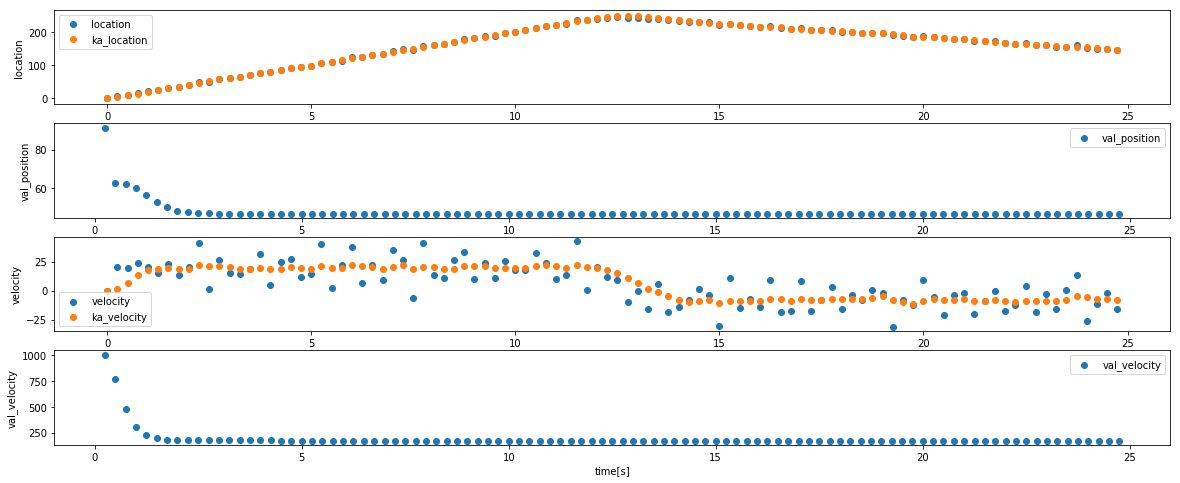

In [6]:
plt.subplots(figsize=(20,8))

plt.subplot(4, 1, 1)
plt.scatter(x= time, y =location, label = "location" )
plt.scatter(x= time, y =kal_location, label = "ka_location" )
plt.legend() 
plt.xlabel('time[s]')
plt.ylabel('location')

plt.subplot(4, 1, 2)
plt.scatter(x= time[1:], y = val_location, label = "val_position" )
plt.legend() 
plt.xlabel('time[s]')
plt.ylabel('val_position')

plt.subplot(4, 1, 3)
plt.scatter(x= time, y = velocity, label = "velocity" )
plt.scatter(x= time, y = kal_velocity, label = "ka_velocity" )
plt.legend() 
plt.xlabel('time[s]')
plt.ylabel('velocity')

plt.subplot(4, 1, 4)
plt.scatter(x= time[1:], y = val_velocity, label = "val_velocity" )
plt.legend() 
plt.xlabel('time[s]')
plt.ylabel('val_velocity')